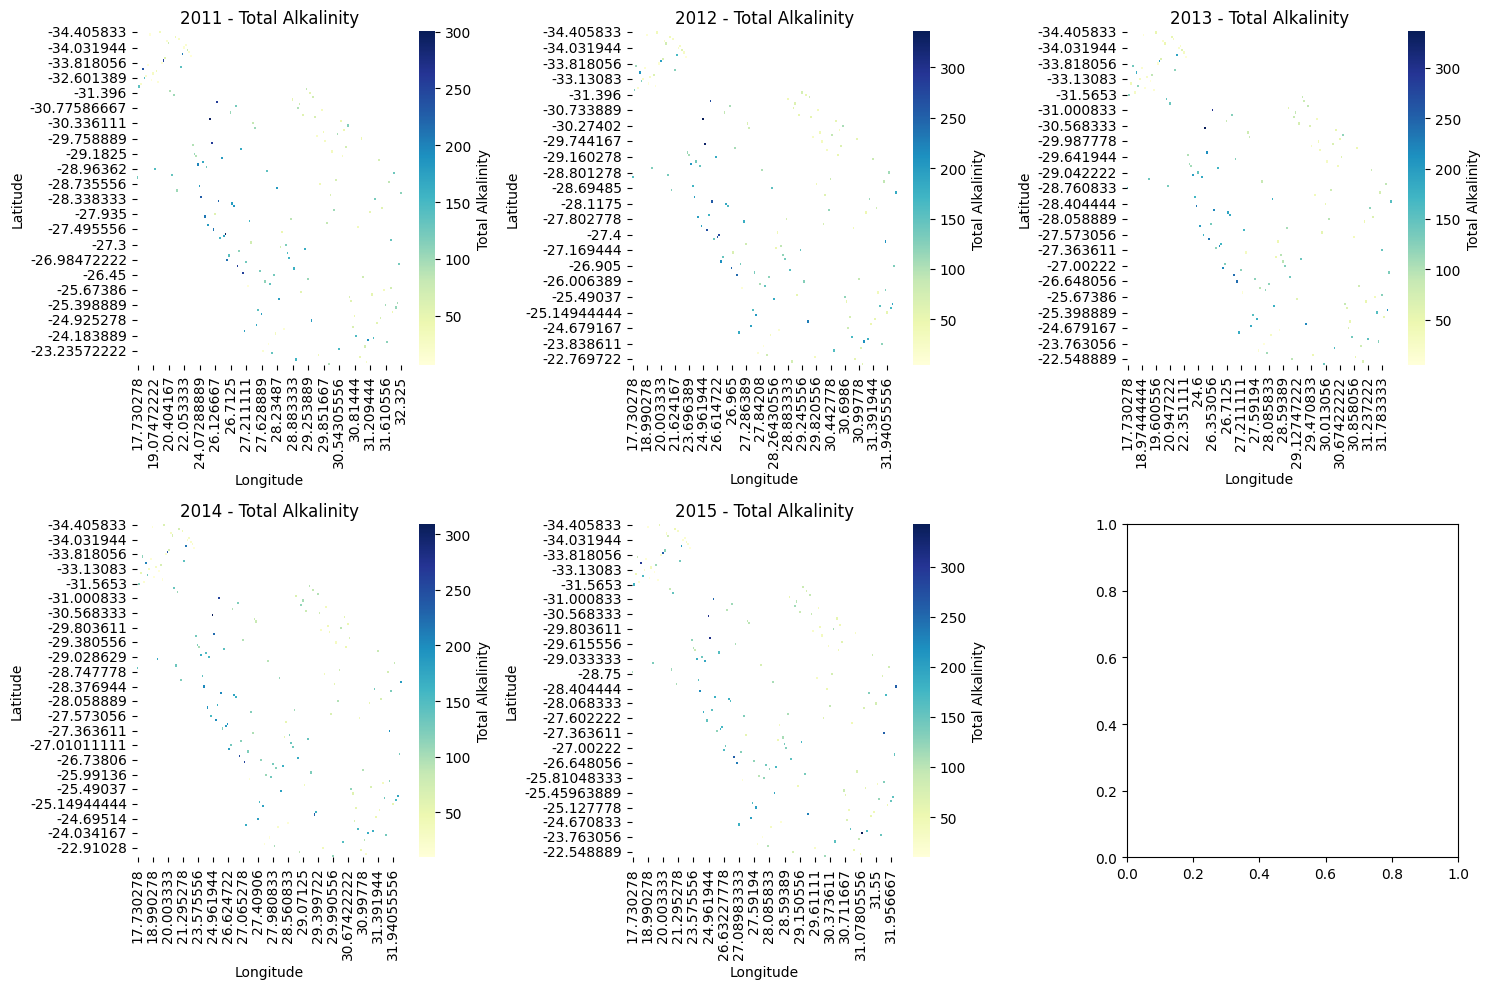

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('water_quality_training_dataset.csv')

df['Sample Date'] = pd.to_datetime(df['Sample Date'], format='%d-%m-%Y')

years = [2011, 2012, 2013, 2014, 2015]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

def plot_heatmap(df, feature, ax, year):
    ax.set_title(f"{year} - {feature}")
    year_df = df[df['Sample Date'].dt.year == year]
    heatmap_data = year_df.pivot_table(index='Latitude', columns='Longitude', values=feature)
    sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': feature}, ax=ax)

plot_heatmap(df, 'Total Alkalinity', axes[0, 0], 2011)
plot_heatmap(df, 'Total Alkalinity', axes[0, 1], 2012)
plot_heatmap(df, 'Total Alkalinity', axes[0, 2], 2013)
plot_heatmap(df, 'Total Alkalinity', axes[1, 0], 2014)
plot_heatmap(df, 'Total Alkalinity', axes[1, 1], 2015)

plt.tight_layout()
plt.show()

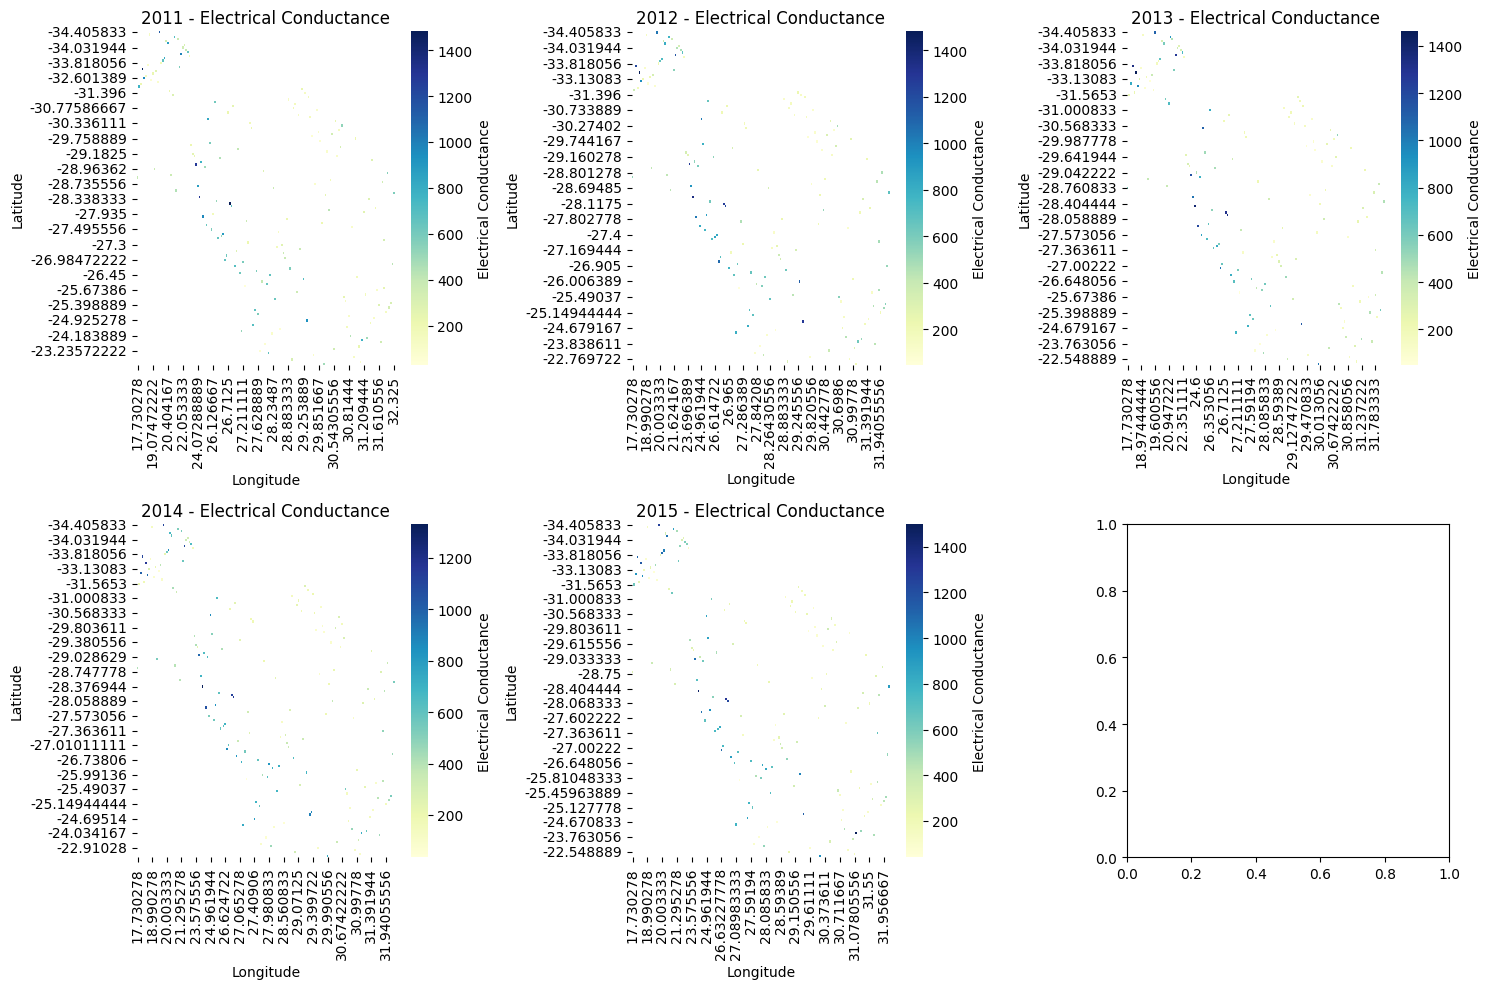

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

plot_heatmap(df, 'Electrical Conductance', axes[0, 0], 2011)
plot_heatmap(df, 'Electrical Conductance', axes[0, 1], 2012)
plot_heatmap(df, 'Electrical Conductance', axes[0, 2], 2013)
plot_heatmap(df, 'Electrical Conductance', axes[1, 0], 2014)
plot_heatmap(df, 'Electrical Conductance', axes[1, 1], 2015)

plt.tight_layout()
plt.show()

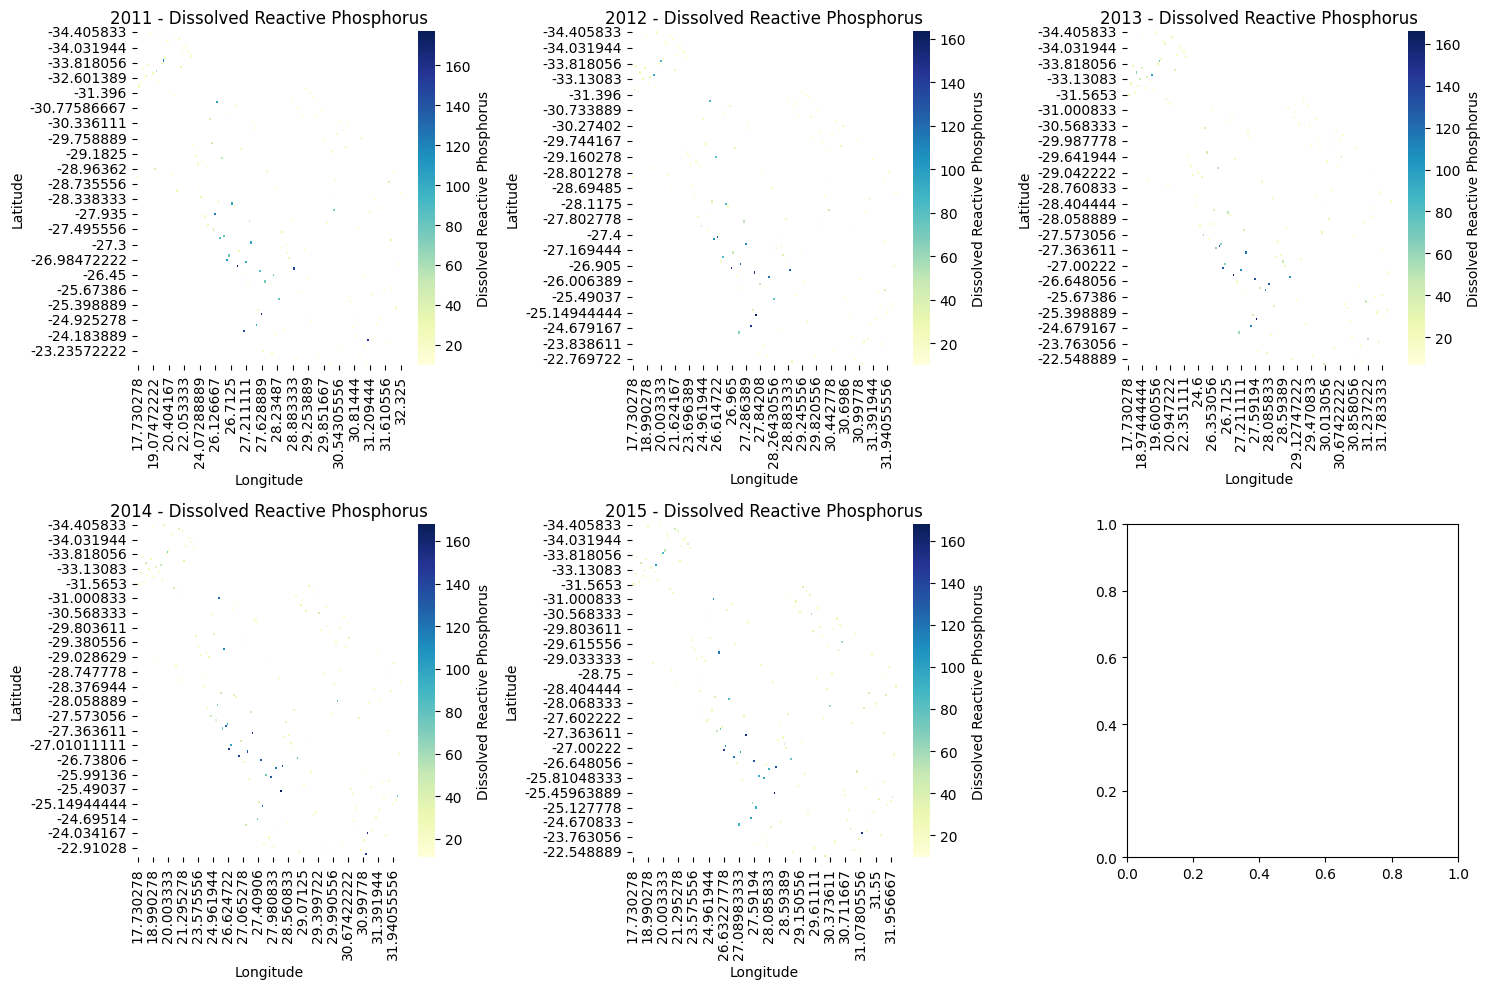

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

plot_heatmap(df, 'Dissolved Reactive Phosphorus', axes[0, 0], 2011)
plot_heatmap(df, 'Dissolved Reactive Phosphorus', axes[0, 1], 2012)
plot_heatmap(df, 'Dissolved Reactive Phosphorus', axes[0, 2], 2013)
plot_heatmap(df, 'Dissolved Reactive Phosphorus', axes[1, 0], 2014)
plot_heatmap(df, 'Dissolved Reactive Phosphorus', axes[1, 1], 2015)

plt.tight_layout()
plt.show()

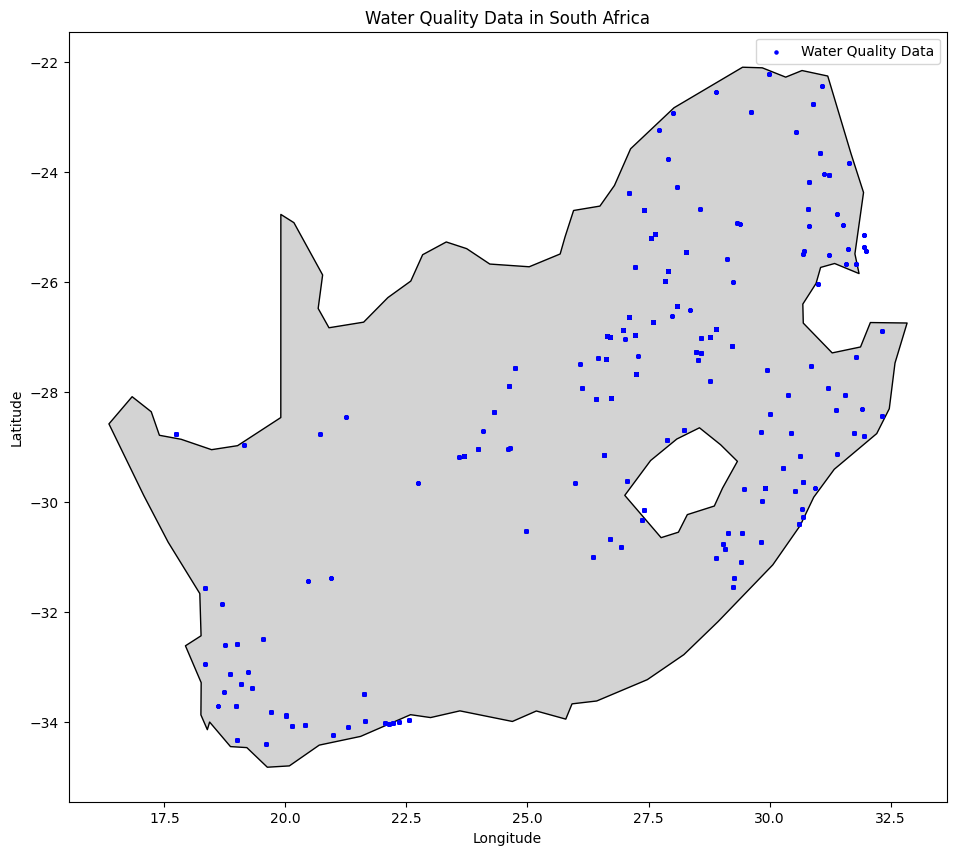

In [21]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

WQ_TRAIN_PATH = "water_quality_training_dataset.csv"
df = pd.read_csv(WQ_TRAIN_PATH)
df.columns = [c.strip() for c in df.columns]  

TARGETS = ["Total Alkalinity", "Electrical Conductance", "Dissolved Reactive Phosphorus"]

for c in ["Latitude", "Longitude"] + TARGETS:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df = df.dropna(subset=["Latitude", "Longitude"] + TARGETS).copy()

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["Longitude"], df["Latitude"]),
    crs="EPSG:4326"
)

url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)

sa = world[world['NAME'].str.contains("South Africa", na=False)].to_crs("EPSG:4326")

fig, ax = plt.subplots(figsize=(12, 10))

sa.plot(ax=ax, color='lightgray', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='blue', markersize=5, label='Water Quality Data')
plt.title("Water Quality Data in South Africa")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.legend()
plt.show()

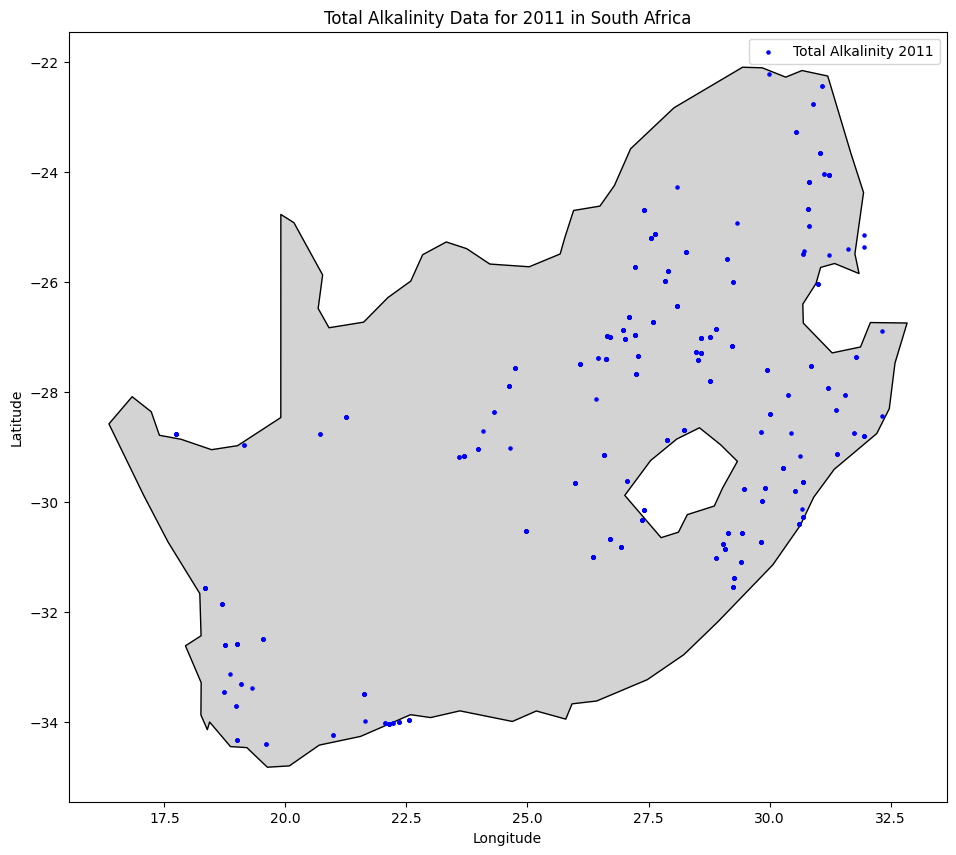

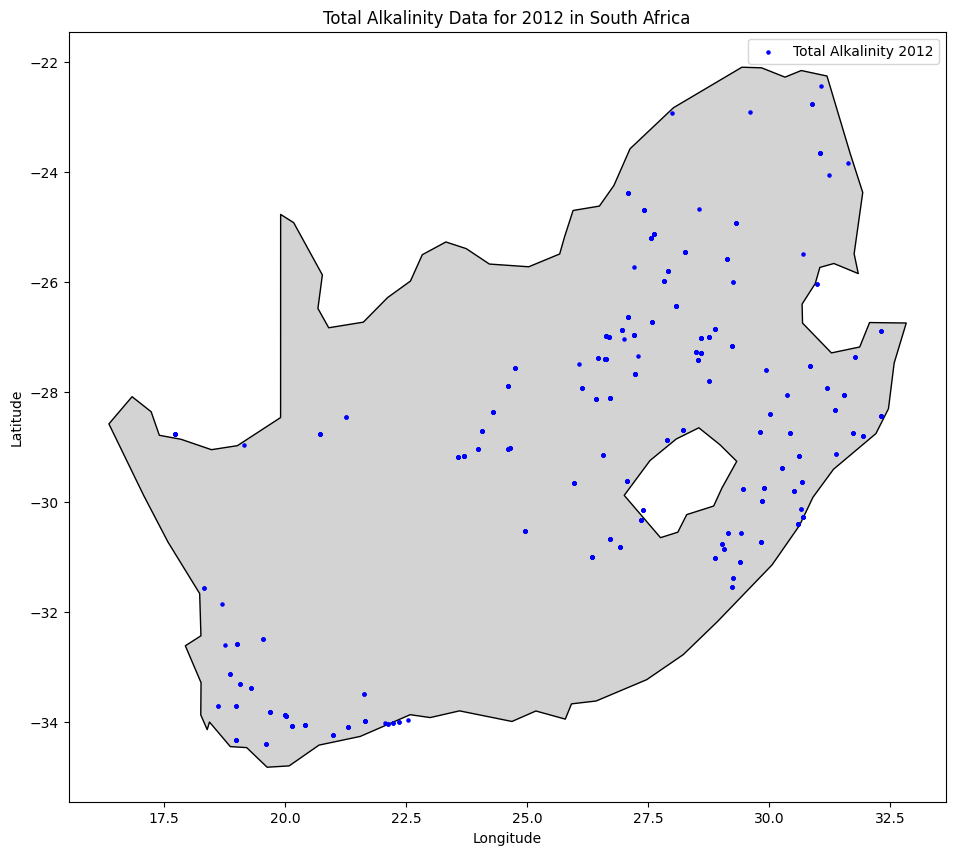

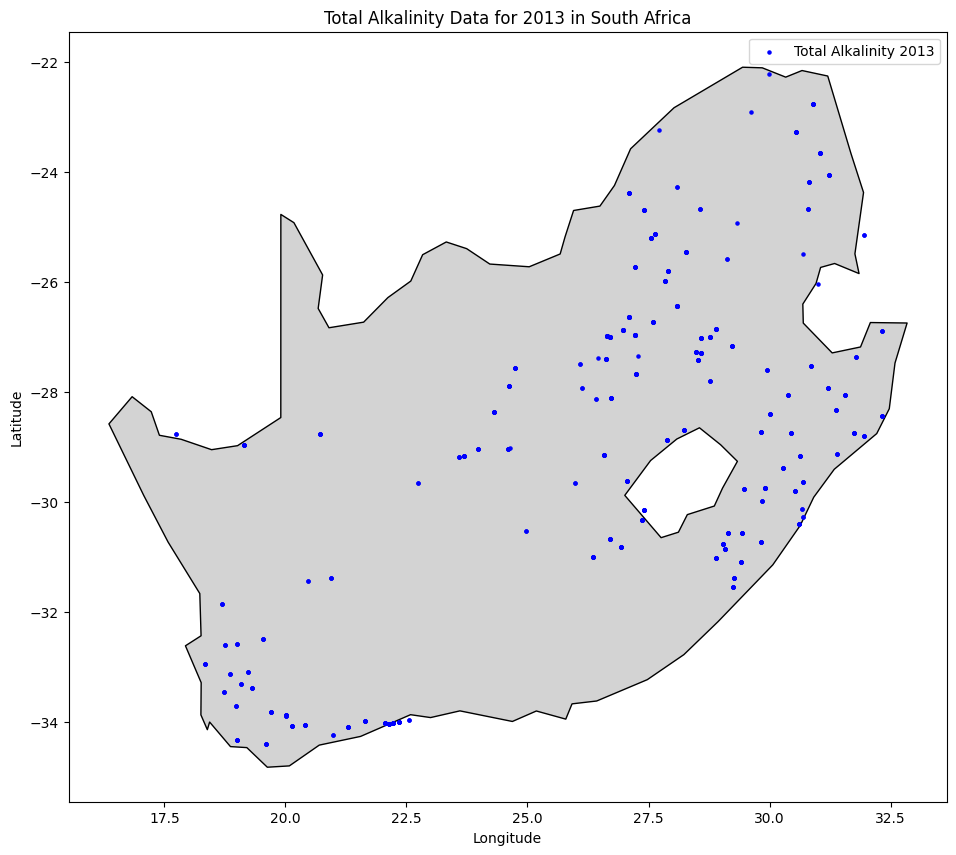

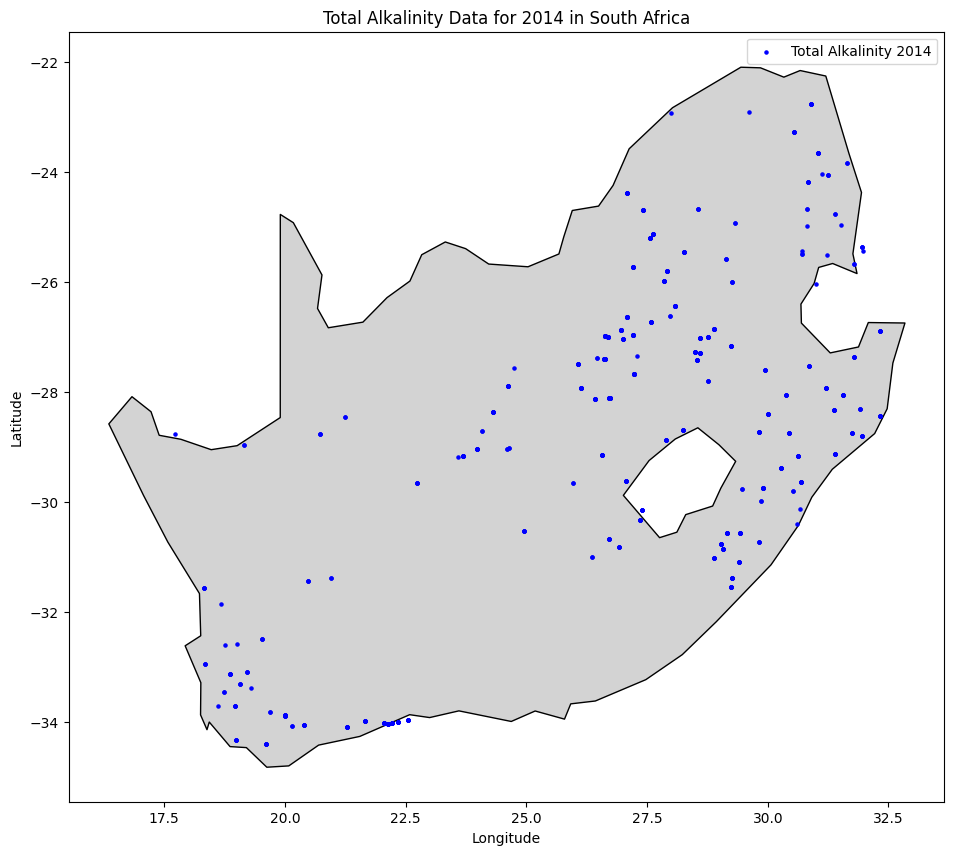

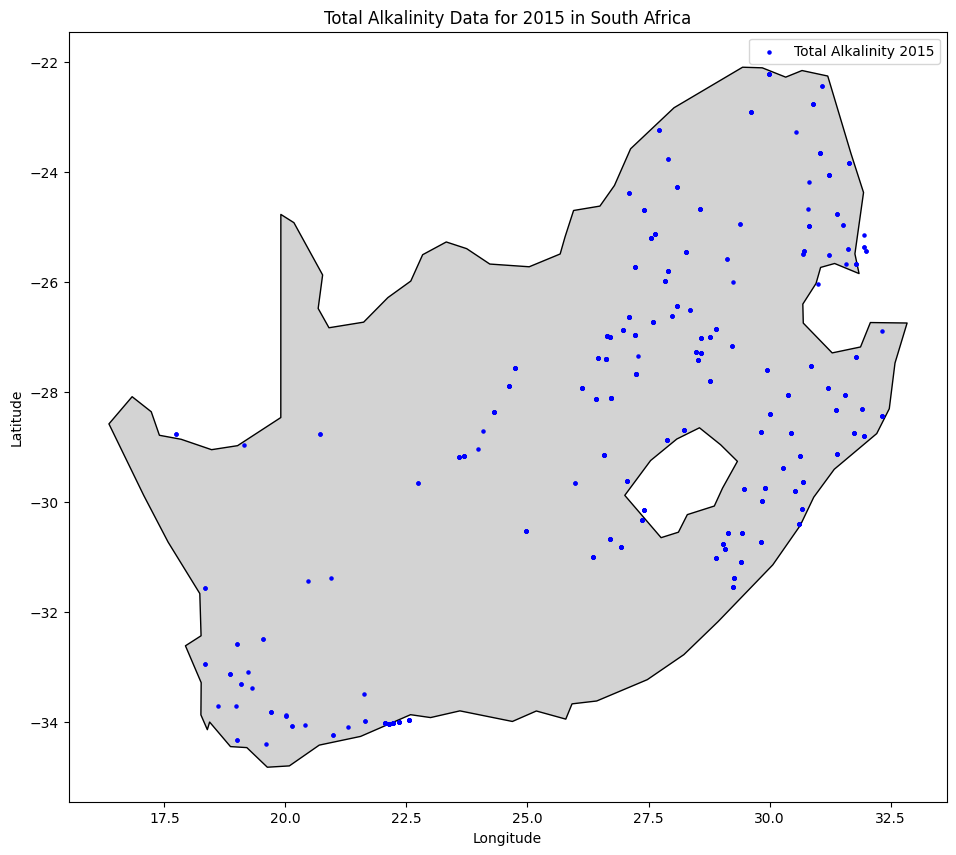

In [23]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

WQ_TRAIN_PATH = "water_quality_training_dataset.csv"
df = pd.read_csv(WQ_TRAIN_PATH)
df.columns = [c.strip() for c in df.columns] 

df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')

df = df[(df['Sample Date'].dt.year >= 2010) & (df['Sample Date'].dt.year <= 2015)]
TARGET = "Total Alkalinity"

df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce")
df = df.dropna(subset=["Latitude", "Longitude", TARGET]).copy()

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["Longitude"], df["Latitude"]),
    crs="EPSG:4326" 
)

url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)

sa = world[world['NAME'].str.contains("South Africa", na=False)].to_crs("EPSG:4326")

years = [2011, 2012, 2013, 2014, 2015]
for year in years:
    df_year = df[df['Sample Date'].dt.year == year]

    gdf_year = gpd.GeoDataFrame(
        df_year,
        geometry=gpd.points_from_xy(df_year["Longitude"], df_year["Latitude"]),
        crs="EPSG:4326"
    )

    fig, ax = plt.subplots(figsize=(12, 10))

    sa.plot(ax=ax, color='lightgray', edgecolor='black')

    gdf_year.plot(ax=ax, marker='o', color='blue', markersize=5, label=f'{TARGET} {year}')

    plt.title(f"Total Alkalinity Data for {year} in South Africa")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    plt.legend()
    plt.show()

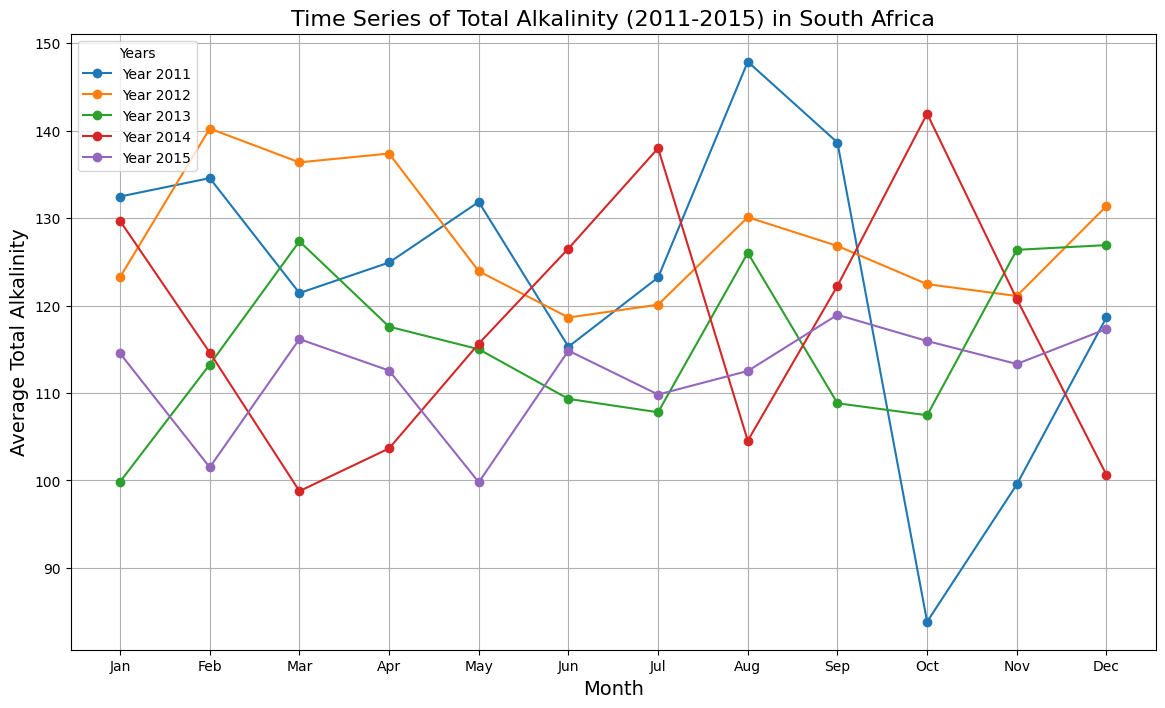

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

WQ_TRAIN_PATH = "water_quality_training_dataset.csv"
df = pd.read_csv(WQ_TRAIN_PATH)
df.columns = [c.strip() for c in df.columns]  

df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')
df = df[(df['Sample Date'].dt.year >= 2010) & (df['Sample Date'].dt.year <= 2015)]

TARGET = "Total Alkalinity"

df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce")
df = df.dropna(subset=["Latitude", "Longitude", TARGET]).copy()

df['Year'] = df['Sample Date'].dt.year
df['Month'] = df['Sample Date'].dt.month

plt.figure(figsize=(14, 8))

for year in range(2011, 2016):
    df_year = df[df['Year'] == year]
    df_monthly = df_year.groupby('Month')[TARGET].mean()
    plt.plot(df_monthly.index, df_monthly.values, label=f'Year {year}', marker='o')

plt.title("Time Series of Total Alkalinity (2011-2015) in South Africa", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Total Alkalinity", fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title="Years", loc='upper left')
plt.grid(True)
plt.show()

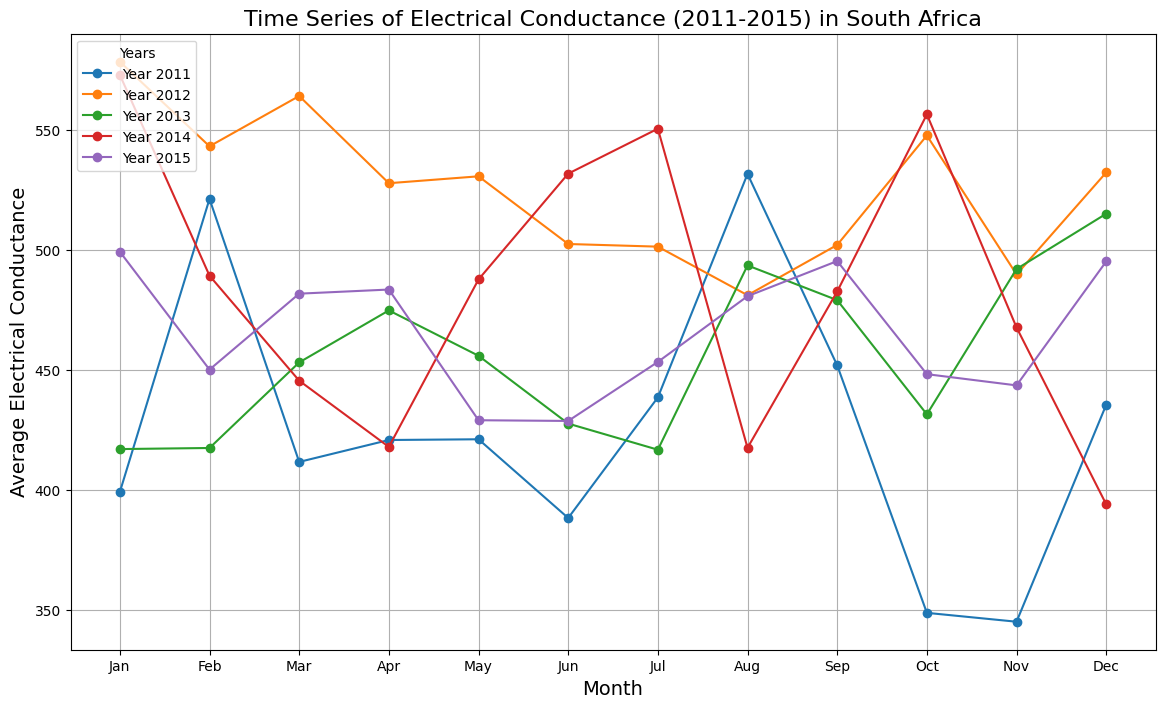

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

WQ_TRAIN_PATH = "water_quality_training_dataset.csv"
df = pd.read_csv(WQ_TRAIN_PATH)
df.columns = [c.strip() for c in df.columns] 

df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')
df = df[(df['Sample Date'].dt.year >= 2010) & (df['Sample Date'].dt.year <= 2015)]

TARGET = "Electrical Conductance"
df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce")
df = df.dropna(subset=["Latitude", "Longitude", TARGET]).copy()
df['Year'] = df['Sample Date'].dt.year
df['Month'] = df['Sample Date'].dt.month

plt.figure(figsize=(14, 8))

for year in range(2011, 2016):
    df_year = df[df['Year'] == year]
    df_monthly = df_year.groupby('Month')[TARGET].mean()
    plt.plot(df_monthly.index, df_monthly.values, label=f'Year {year}', marker='o')

plt.title("Time Series of Electrical Conductance (2011-2015) in South Africa", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Electrical Conductance", fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title="Years", loc='upper left')

plt.grid(True)
plt.show()